<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml15_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA(Principal Component Analysis, 주성분 분석)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터셋

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits.npy

--2026-02-05 01:21:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-05 01:21:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-05 01:21:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [3]:
fruits = np.load('fruits.npy')

In [4]:
fruits.shape

(300, 100, 100)

In [10]:
def plot_img_array(arr, ncols=10):
    # arr: (n_samples, height, width) 모양의 3차원 배열
    n = len(arr)  # 배열의 아이템 개수(이미지 배열 개수)
    nrows = int(np.ceil(n / ncols))
    # figsize=(figure_width, figure_height)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:  # axes는 1차원 배열
                if idx < n:
                    axes[idx].imshow(arr[idx], cmap=plt.cm.binary)
                axes[idx].axis('off')
            else:  # axes는 2차원 배열
                if idx < n:
                    axes[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                axes[i, j].axis('off')
    plt.show()

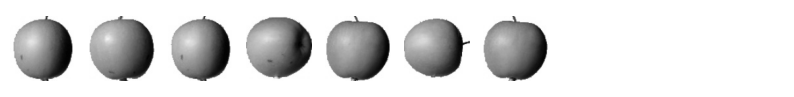

In [11]:
plot_img_array(fruits[:7])

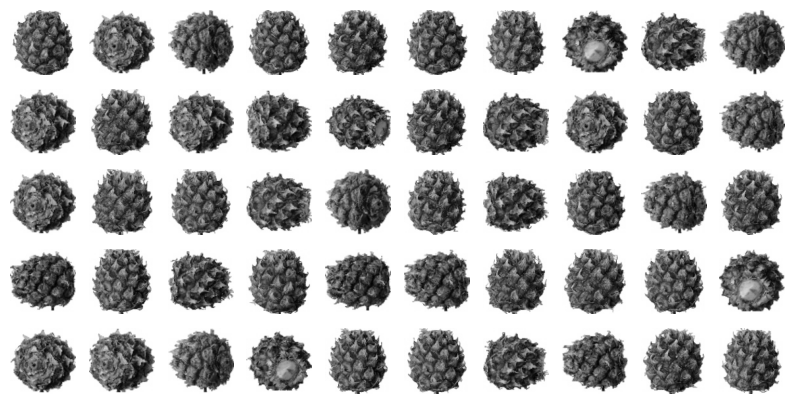

In [12]:
plot_img_array(fruits[100:150])

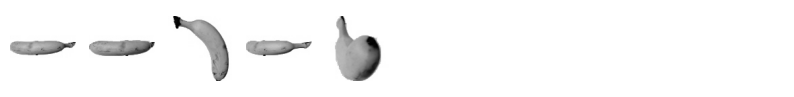

In [13]:
plot_img_array(fruits[200:205])